In [ ]:
import ROOT as r

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import mplhep as hep
from root_numpy import hist2array

In [60]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

f = r.TFile.Open(testFileName)
tree = f.Get("Events")

In [61]:
jet0Masses = r.TH1F("jet0m","",300,0,3000)
jet1Masses = r.TH1F("jet1m","",300,0,3000)
jet2Masses = r.TH1F("jet2m","",300,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
    jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
    jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())

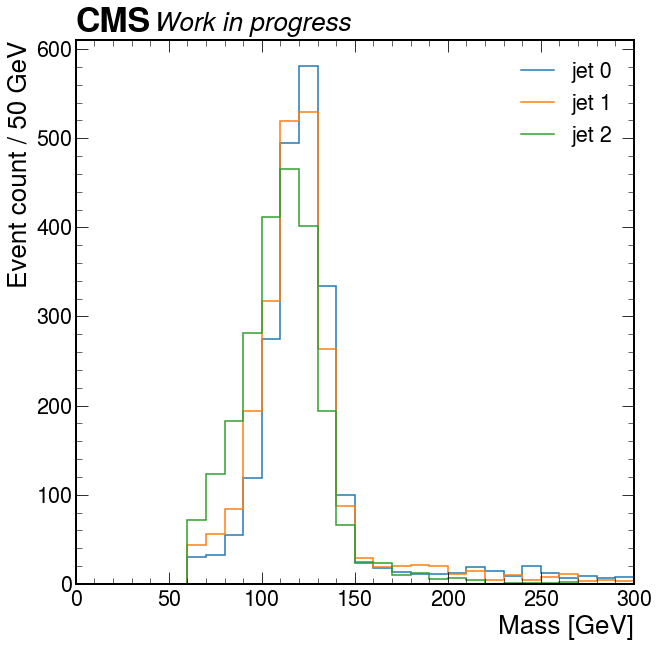

In [64]:
plt.style.use([hep.style.CMS])

jet0, edges = hist2array(jet0Masses,return_edges=True)
jet1, edges = hist2array(jet1Masses,return_edges=True)
jet2, edges = hist2array(jet2Masses,return_edges=True)

edges = edges[0]

hep.histplot([jet0,jet1,jet2],edges,label=["jet 0","jet 1","jet 2"],stack=False)

hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 300])
plt.legend(loc='best')

#gauss_fit(jet0, edges, [600, 120, 4])

In [65]:
def root_gaus(jet):
    fit = jet.Fit("gaus","S","",50,200)
    c = r.TCanvas("c","",1000,1000)
    c.cd()
    jet.Draw()
    jet.GetXaxis().SetRangeUser(0., 200.);
    fit.Draw()
    c.Draw()

    sigma = fit.Get().Parameters()[2]
    print("Standard deviation is {0:.2f} GeV".format(sigma))


Standard deviation is 14.47 GeV
 FCN=132.689 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=9.81872e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.41678e+02   1.68603e+01   6.90076e-02  -5.35222e-05
   2  Mean         1.19999e+02   3.45848e-01   1.84315e-03  -2.88076e-03
   3  Sigma        1.44671e+01   3.10179e-01   2.46073e-05  -2.31090e-02


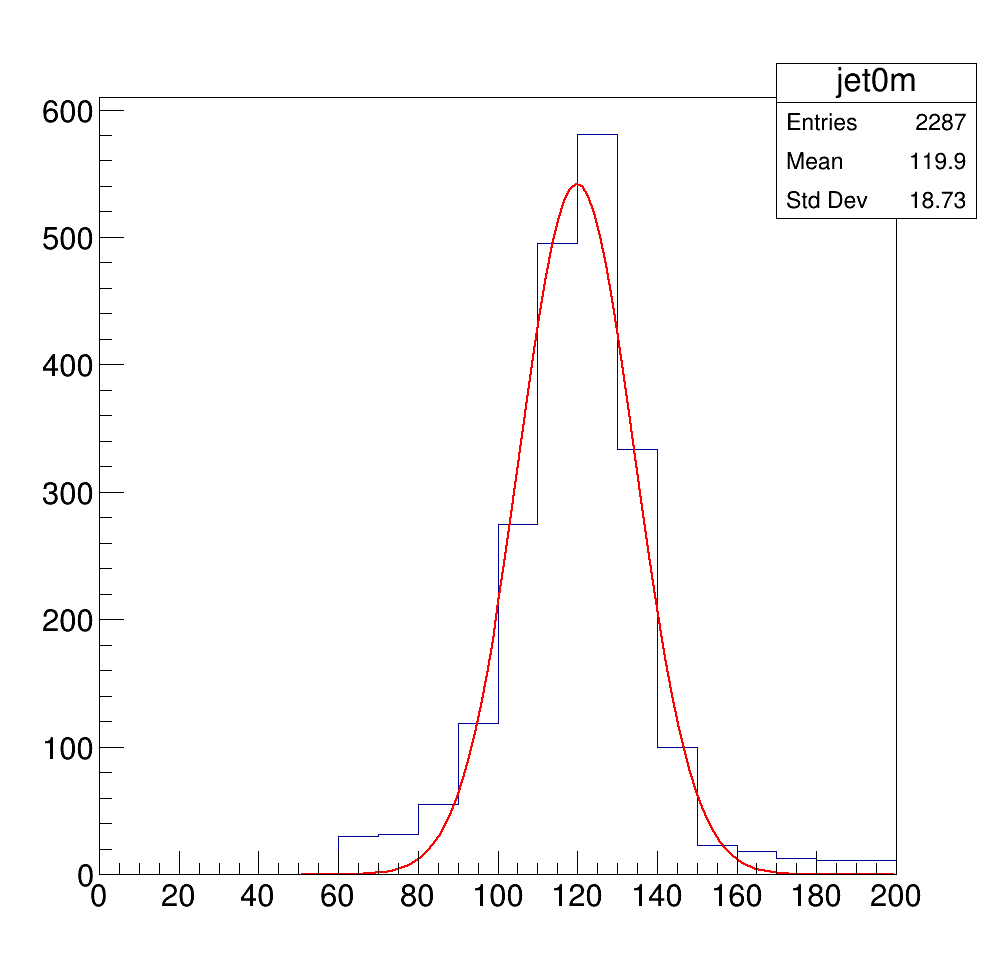

In [67]:
root_gaus(jet0Masses) #jet0

Standard deviation is 16.62 GeV
 FCN=169.265 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=2.8454e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.88594e+02   1.54585e+01   6.90183e-02   1.78429e-06
   2  Mean         1.16673e+02   3.95183e-01   2.35146e-03  -1.56958e-04
   3  Sigma        1.66183e+01   3.76489e-01   2.83805e-05   6.34462e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


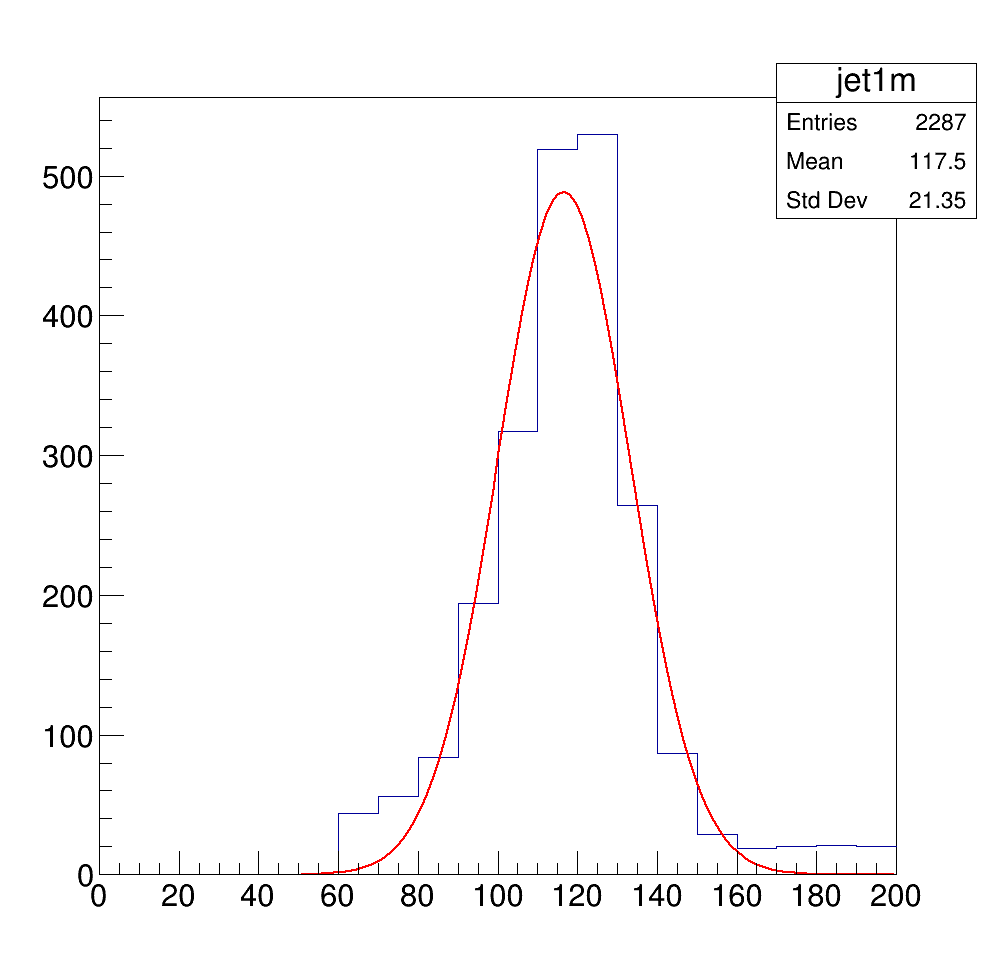

In [68]:
root_gaus(jet1Masses) #jet1

Standard deviation is 20.12 GeV
 FCN=98.3195 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=5.92731e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.33703e+02   1.27003e+01   4.52778e-02   6.96503e-06
   2  Mean         1.09489e+02   4.84074e-01   2.15052e-03  -1.90955e-04
   3  Sigma        2.01155e+01   4.24083e-01   2.28545e-05   6.76795e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


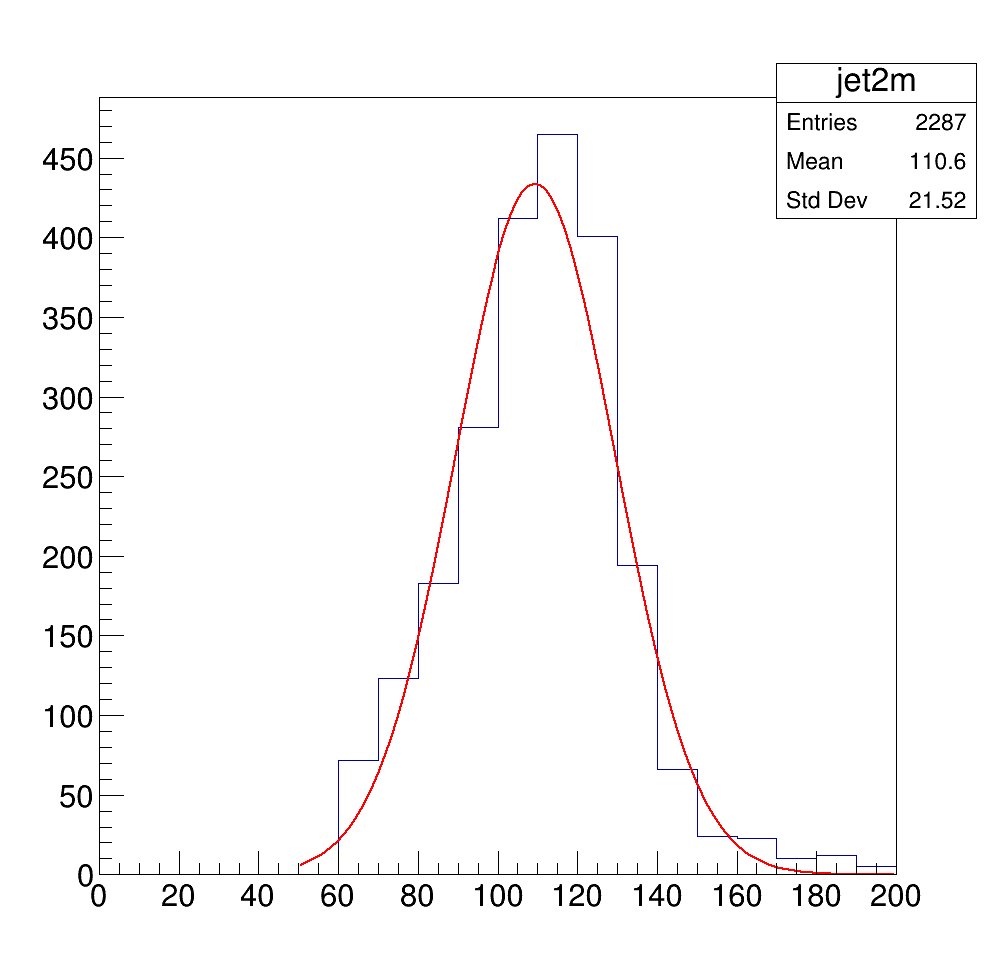

In [69]:
root_gaus(jet2Masses) #jet2

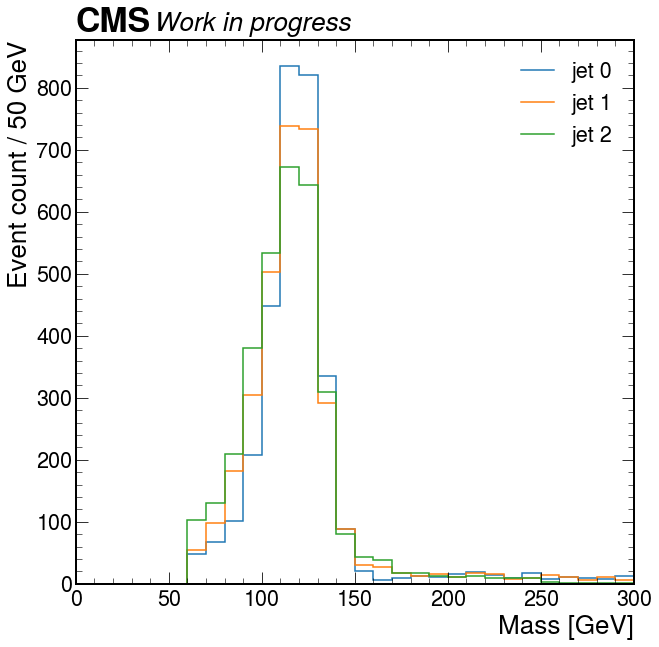

In [70]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_2800_M2_1500_NANOAOD.root"
#2800 1500
f = r.TFile.Open(testFileName)
tree = f.Get("Events")

jet0Masses = r.TH1F("jet0m","",300,0,3000)
jet1Masses = r.TH1F("jet1m","",300,0,3000)
jet2Masses = r.TH1F("jet2m","",300,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
    jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
    jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())
    
plt.style.use([hep.style.CMS])

jet0, edges = hist2array(jet0Masses,return_edges=True)
jet1, edges = hist2array(jet1Masses,return_edges=True)
jet2, edges = hist2array(jet2Masses,return_edges=True)

edges = edges[0]

hep.histplot([jet0,jet1,jet2],edges,label=["jet 0","jet 1","jet 2"],stack=False)

hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 300])
plt.legend(loc='best')

#gauss_fit(jet0, edges, [600, 120, 4])

Standard deviation is 13.79 GeV
 FCN=208.117 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=5.51801e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.11068e+02   2.16294e+01   1.08150e-01  -1.28577e-06
   2  Mean         1.17445e+02   2.83696e-01   1.83933e-03   6.70238e-05
   3  Sigma        1.37917e+01   2.59662e-01   2.61082e-05   1.49558e-03


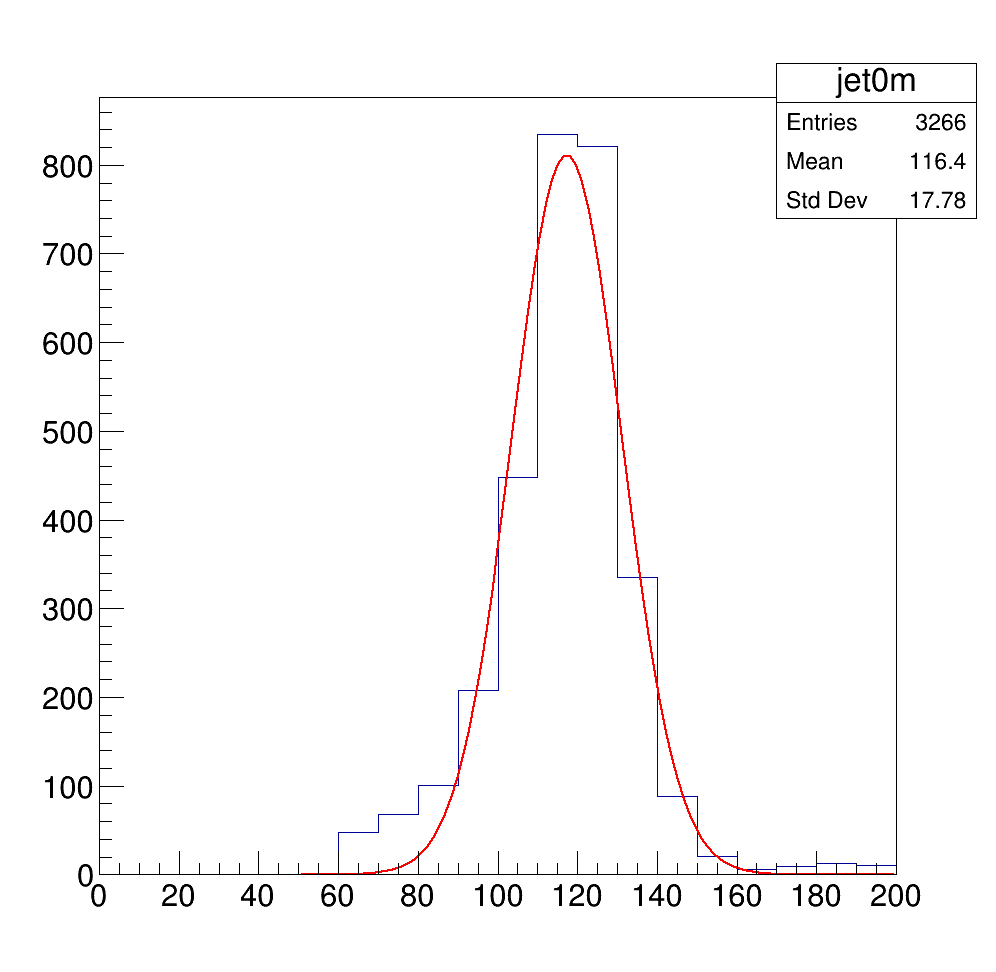

In [71]:
root_gaus(jet0Masses)

Standard deviation is 17.08 GeV
 FCN=219.843 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.2261e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.72518e+02   1.80578e+01   9.09770e-02  -1.36741e-05
   2  Mean         1.13788e+02   3.62706e-01   2.32070e-03  -9.42180e-04
   3  Sigma        1.70794e+01   3.33023e-01   2.81049e-05   2.51175e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


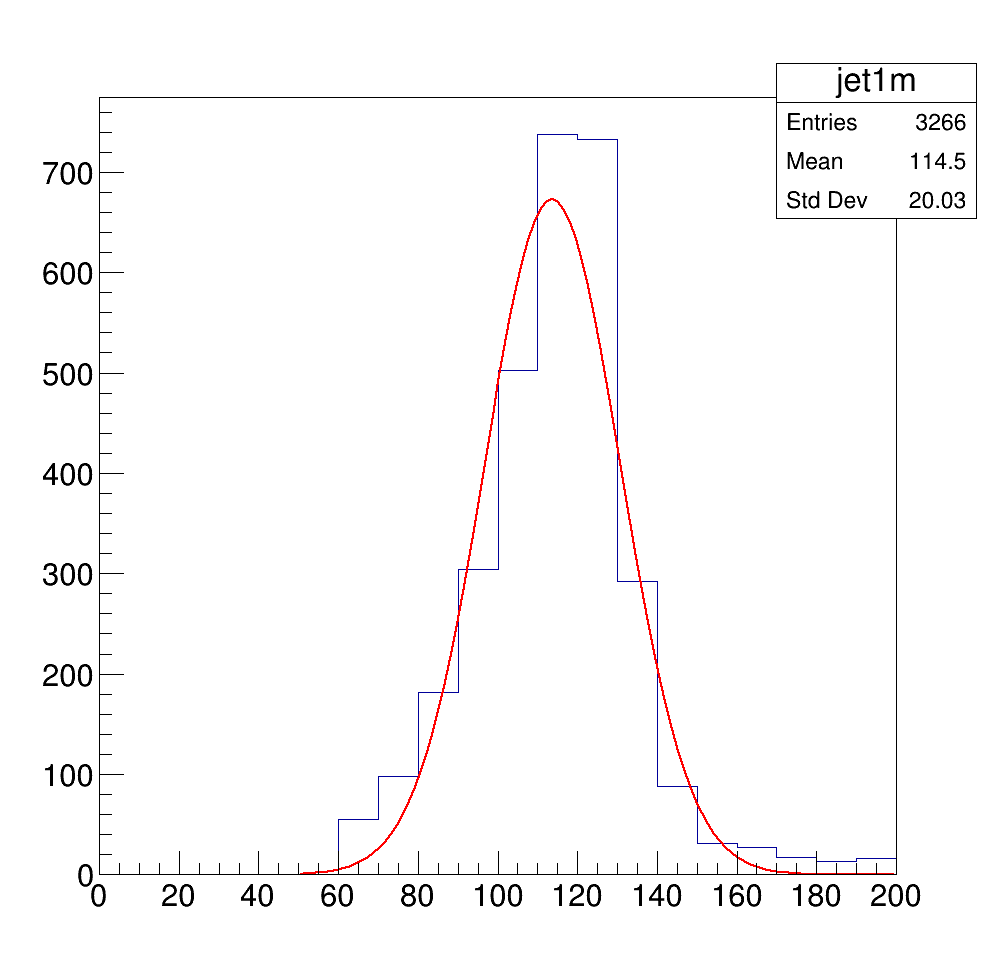

In [72]:
root_gaus(jet1Masses)

Standard deviation is 19.06 GeV
 FCN=211.815 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=8.58338e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.26458e+02   1.62532e+01   8.16866e-02   5.67951e-06
   2  Mean         1.11526e+02   3.87104e-01   2.51921e-03  -5.37025e-05
   3  Sigma        1.90571e+01   3.61327e-01   2.81565e-05  -5.97941e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


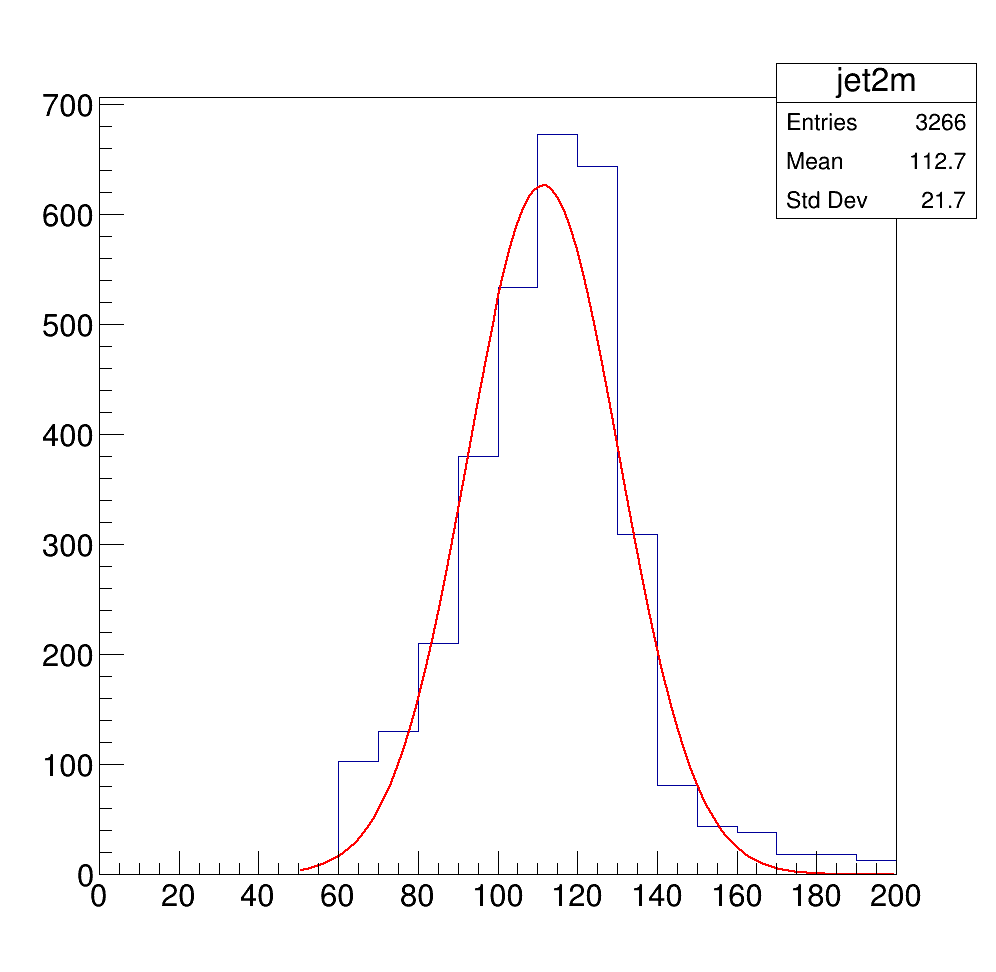

In [73]:
root_gaus(jet2Masses)

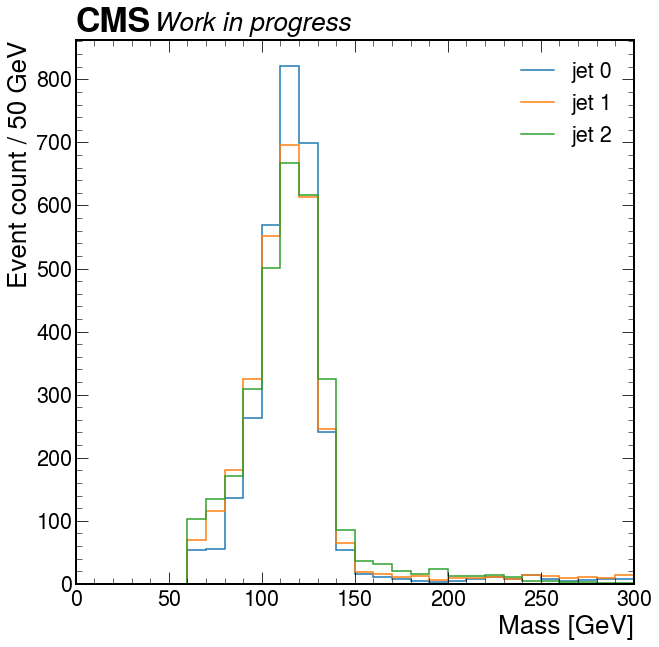

In [74]:
testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_3600_M2_1100_NANOAOD.root"
#3600 1100
f = r.TFile.Open(testFileName)
tree = f.Get("Events")

jet0Masses = r.TH1F("jet0m","",300,0,3000)
jet1Masses = r.TH1F("jet1m","",300,0,3000)
jet2Masses = r.TH1F("jet2m","",300,0,3000)

nEvts = tree.GetEntriesFast()

for i in range(nEvts):    
    tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
    jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
    jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())
plt.style.use([hep.style.CMS])

jet0, edges = hist2array(jet0Masses,return_edges=True)
jet1, edges = hist2array(jet1Masses,return_edges=True)
jet2, edges = hist2array(jet2Masses,return_edges=True)

edges = edges[0]

hep.histplot([jet0,jet1,jet2],edges,label=["jet 0","jet 1","jet 2"],stack=False)

hep.cms.text("Work in progress",loc=0)
plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
plt.xlim([0, 300])
plt.legend(loc='best')

#gauss_fit(jet0, edges, [600, 120, 4])

Standard deviation is 14.16 GeV
 FCN=161.019 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=3.11555e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.80489e+02   2.05605e+01   9.21909e-02  -2.97948e-07
   2  Mean         1.14251e+02   2.95714e-01   1.67326e-03  -8.54619e-06
   3  Sigma        1.41592e+01   2.58517e-01   2.35577e-05   3.46737e-03


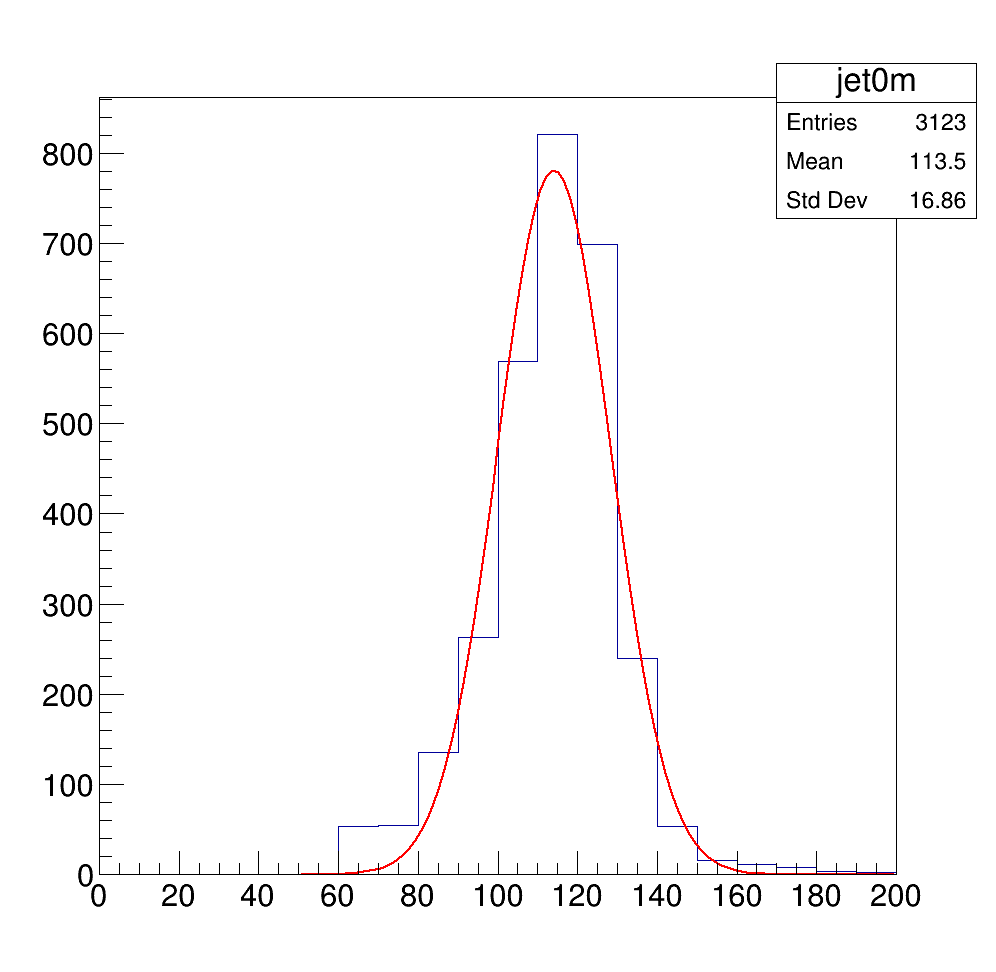

In [75]:
root_gaus(jet0Masses)

Standard deviation is 16.77 GeV
 FCN=175.686 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=2.08185e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.53784e+02   1.73284e+01   8.09706e-02  -2.72188e-07
   2  Mean         1.11924e+02   3.69282e-01   2.08698e-03   2.38228e-05
   3  Sigma        1.67722e+01   3.11865e-01   2.47497e-05  -3.06693e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


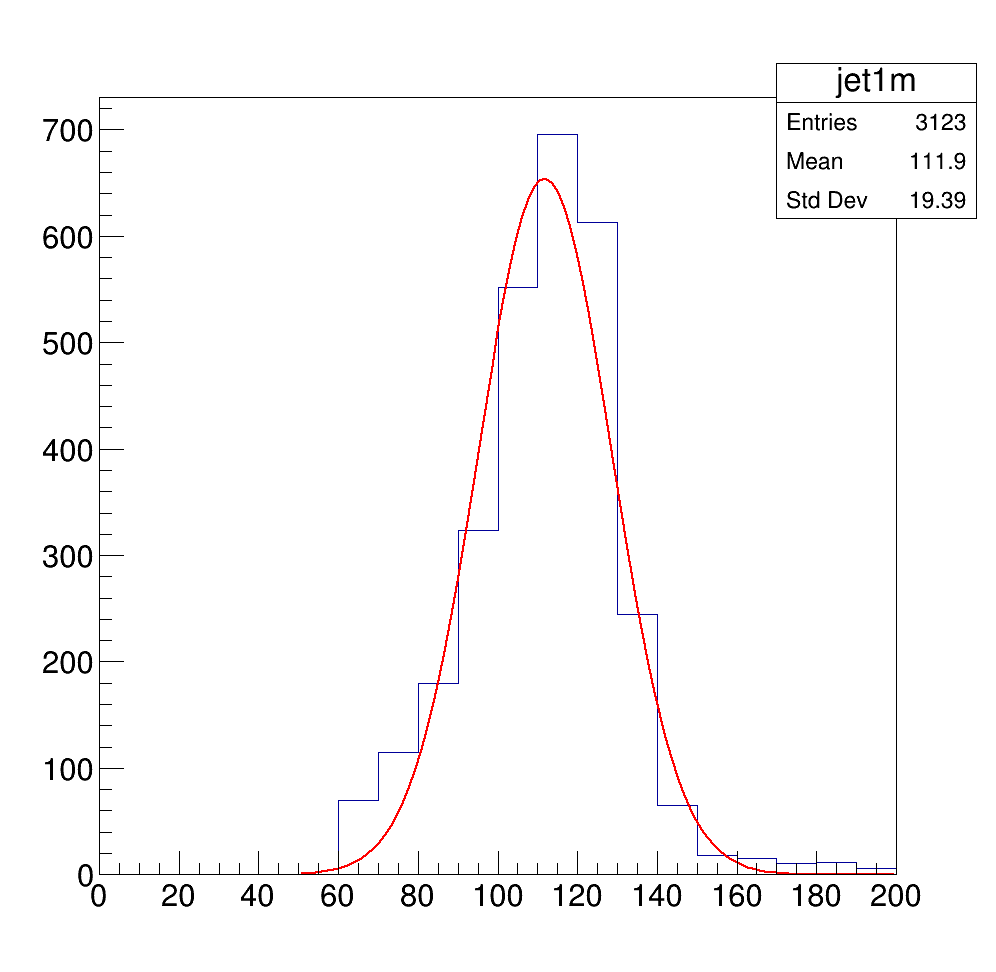

In [76]:
root_gaus(jet1Masses)

Standard deviation is 18.35 GeV
 FCN=252.555 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=4.85956e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.07413e+02   1.69448e+01   8.94262e-02  -4.53824e-07
   2  Mean         1.13005e+02   4.01631e-01   2.72470e-03  -1.21985e-05
   3  Sigma        1.83525e+01   3.83364e-01   3.08438e-05  -1.33303e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


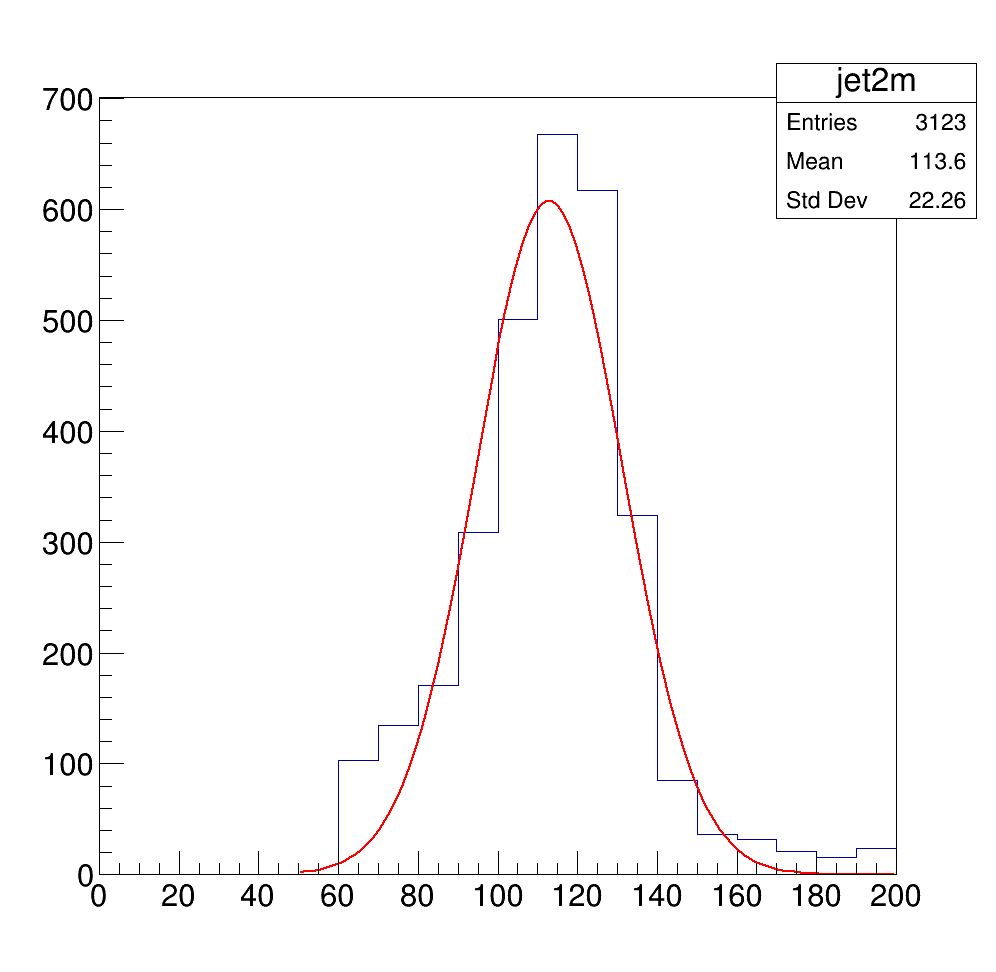

In [77]:
root_gaus(jet2Masses)

In [ ]:
def fun(filename):
    testFileName = "/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_3600_M2_1100_NANOAOD.root"
#3600 1100
    f = r.TFile.Open(testFileName)
    tree = f.Get("Events")

    jet0Masses = r.TH1F("jet0m","",300,0,3000)
    jet1Masses = r.TH1F("jet1m","",300,0,3000)
    jet2Masses = r.TH1F("jet2m","",300,0,3000)

    nEvts = tree.GetEntriesFast()

    for i in range(nEvts):    
        tree.GetEvent(i)
    
    
    if tree.nFatJet<3:
        continue
    
    pts     = tree.FatJet_pt
    etas    = tree.FatJet_eta
    phis    = tree.FatJet_phi
    masses  = tree.FatJet_msoftdrop
    
    jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
    jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
    jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

    if not (jet0Flag and jet1Flag and jet2Flag):
        continue
    
    jet0 = r.TLorentzVector()
    jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])
    
    jet1 = r.TLorentzVector()
    jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])
    
    jet2 = r.TLorentzVector()
    jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])
    
    
    jet0Masses.Fill(jet0.M())
    jet1Masses.Fill(jet1.M())
    jet2Masses.Fill(jet2.M())
    
    fit = jet0Masses.Fit("gaus","S","",50,200)
    c = r.TCanvas("c","",1000,1000)
    c.cd()
    jet0Masses.Draw()
    jet0Masses.GetXaxis().SetRangeUser(0., 200.);
    fit.Draw()
    c.Draw()

    sigma = fit.Get().Parameters()[2]
    print("Standard deviation is {0:.2f} GeV".format(sigma))
    
    
fun("name")

In [25]:
#gauss fit
from scipy.stats import norm

def gauss(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma)**2)

def gauss_fit(jet, edges, p0):
    x = [] #bin centers
    for i in range(len(edges)-1):
        x.append(edges[i]/2.+edges[i+1]/2.)
    y = jet
    
    print(x,y)
    
    
    popt, pcov = curve_fit(gauss, x, y, p0, maxfev=100000)
    
    print(popt)
    
    hep.histplot(jet,edges,label=["Data"],stack=False)
    x_interval_for_fit = np.linspace(x[0], x[-1], 10000)
    plt.plot(x_interval_for_fit, gauss(x_interval_for_fit, *popt), label='fit')
    plt.legend()


#gauss_fit(jet0[:20], edges[:21], [1,120,10])#We "cut" the list to only fit the interesting part